# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import streamlit as st
warnings.filterwarnings('ignore')

# Data Collection

In [7]:
#Load Dataset
# Load dataset
df = pd.read_csv(r"C:\Users\viswa\OneDrive\Desktop\project\option 1 upi\UPI-FRAUD-DETECTION-main\dataset\upi_fraud_dataset.csv")



In [8]:
#Datatypes overview
print("Dataset Info: ")
df.info()

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2666 non-null   int64  
 1   trans_hour    2666 non-null   int64  
 2   trans_day     2666 non-null   int64  
 3   trans_month   2666 non-null   int64  
 4   trans_year    2666 non-null   int64  
 5   category      2666 non-null   int64  
 6   upi_number    2666 non-null   int64  
 7   age           2666 non-null   int64  
 8   trans_amount  2666 non-null   float64
 9   state         2666 non-null   int64  
 10  zip           2666 non-null   int64  
 11  fraud_risk    2666 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 250.1 KB


In [9]:
#Dataset Shape
df.shape

(2666, 12)

In [10]:
#Top 5 rows
print("Top 5 rows:")
df.head()

Top 5 rows:


,Unnamed: 0,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
0,0,0,1,1,2022,12,9957000001,54,66.21,22,49879,0
1,1,1,1,1,2022,3,9957000002,15,55.81,14,62668,0
2,2,3,1,1,2022,8,9957000003,60,8.68,4,96037,0
3,3,6,1,1,2022,4,9957000004,44,89.52,40,29911,0
4,4,6,1,1,2022,0,9957000005,72,1.90,38,16421,0


In [11]:
df.columns

Index(['Unnamed: 0', 'trans_hour', 'trans_day', 'trans_month', 'trans_year',
       'category', 'upi_number', 'age', 'trans_amount', 'state', 'zip',
       'fraud_risk'],
      dtype='object')

# Check for Quality issues

In [12]:
#Check for duplicates
df.duplicated().sum()

0

In [13]:
#Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Unnamed: 0      0
trans_hour      0
trans_day       0
trans_month     0
trans_year      0
category        0
upi_number      0
age             0
trans_amount    0
state           0
zip             0
fraud_risk      0
dtype: int64


In [14]:
#Check for unique values
df.nunique()

Unnamed: 0      2664
trans_hour        24
trans_day         23
trans_month       12
trans_year         1
category          14
upi_number      2666
age               80
trans_amount    2504
state             49
zip              634
fraud_risk         2
dtype: int64

In [15]:
#Find unique columns with unique values
unique_columns = df.columns[df.nunique() == len(df)]
print("Unique columns with unique values:")
print(unique_columns)

Unique columns with unique values:
Index(['upi_number'], dtype='object')


# Statistical Analysis

In [16]:
#Basic Statistical Description
print("Statistical Description:")
display(df.describe().T)

Statistical Description:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2666.0,1.332502e+03,7.697536e+02,0.000000e+00,6.662500e+02,1.332500e+03,1.998750e+03,2.665000e+03
trans_hour,2666.0,1.338372e+01,8.669769e+00,0.000000e+00,3.000000e+00,1.500000e+01,2.200000e+01,2.300000e+01
trans_day,2666.0,1.355214e+01,1.031692e+01,1.000000e+00,3.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
trans_month,2666.0,3.868717e+00,3.198150e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.200000e+01
trans_year,2666.0,2.022000e+03,0.000000e+00,2.022000e+03,2.022000e+03,2.022000e+03,2.022000e+03,2.022000e+03
category,2666.0,6.800075e+00,3.826561e+00,0.000000e+00,4.000000e+00,7.000000e+00,1.100000e+01,1.300000e+01
upi_number,2666.0,8.045540e+09,1.027994e+09,6.900000e+09,7.086000e+09,7.662001e+09,9.101000e+09,9.957000e+09
age,2666.0,4.609827e+01,1.886337e+01,1.400000e+01,3.100000e+01,4.500000e+01,5.800000e+01,9.400000e+01
trans_amount,2666.0,3.298443e+02,3.859642e+02,1.020000e+00,2.098750e+01,1.132550e+02,7.151875e+02,3.413050e+03
state,2666.0,2.715379e+01,1.408411e+01,0.000000e+00,1.500000e+01,2.900000e+01,3.800000e+01,5.000000e+01


In [17]:
# Distribution of target variable
df['fraud_risk'].value_counts(normalize=True)*100

fraud_risk
1    59.189797
0    40.810203
Name: proportion, dtype: float64

<Axes: xlabel='fraud_risk', ylabel='count'>

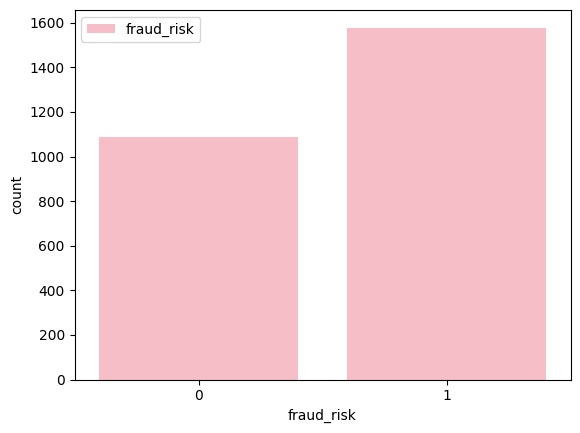

In [18]:
# Distribution of target variable
sns.countplot(x='fraud_risk', data=df,color='lightpink', label= 'fraud_risk')

In [19]:
# Create separate DataFrames for normal and fraudulent transactions
normal = df[df['fraud_risk'] == 0]
fraud = df[df['fraud_risk'] == 1]

In [20]:
fraud.shape

(1578, 12)

In [21]:
fraud.head()

,Unnamed: 0,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
12,12,1,1,2,2022,4,9957000013,30,281.06,27,28611,1
13,13,1,1,2,2022,2,9957000014,58,11.52,43,78208,1
14,14,3,1,2,2022,4,9957000015,58,276.31,43,78208,1
16,16,3,1,2,2022,2,9957000017,30,7.03,27,28611,1
18,18,3,1,2,2022,4,9957000019,58,275.73,43,78208,1


In [22]:
fraud.dtypes

Unnamed: 0        int64
trans_hour        int64
trans_day         int64
trans_month       int64
trans_year        int64
category          int64
upi_number        int64
age               int64
trans_amount    float64
state             int64
zip               int64
fraud_risk        int64
dtype: object

In [23]:
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1578.0,1.280378e+03,7.340823e+02,1.200000e+01,6.422500e+02,1.268000e+03,1.913500e+03,2.663000e+03
trans_hour,1578.0,1.366033e+01,9.761452e+00,0.000000e+00,2.000000e+00,2.050000e+01,2.300000e+01,2.300000e+01
trans_day,1578.0,1.374778e+01,1.020089e+01,1.000000e+00,3.000000e+00,1.500000e+01,2.200000e+01,3.100000e+01
trans_month,1578.0,3.906844e+00,3.314168e+00,1.000000e+00,1.250000e+00,3.000000e+00,6.000000e+00,1.200000e+01
trans_year,1578.0,2.022000e+03,0.000000e+00,2.022000e+03,2.022000e+03,2.022000e+03,2.022000e+03,2.022000e+03
category,1578.0,7.197085e+00,3.776047e+00,0.000000e+00,4.000000e+00,8.000000e+00,1.100000e+01,1.300000e+01
upi_number,1578.0,8.030304e+09,1.026170e+09,6.900000e+09,7.086000e+09,7.662001e+09,9.101000e+09,9.957000e+09
age,1578.0,4.714005e+01,1.983010e+01,1.700000e+01,3.000000e+01,4.600000e+01,6.100000e+01,9.300000e+01
trans_amount,1578.0,5.111743e+02,3.977372e+02,4.500000e+00,1.012950e+02,3.477700e+02,8.987125e+02,1.334070e+03
state,1578.0,2.701331e+01,1.399308e+01,0.000000e+00,1.500000e+01,2.900000e+01,3.800000e+01,5.000000e+01


# Correlation check for entire dataset

In [24]:
numeric_columns_df = df.select_dtypes(include=['int64','float64'])

In [25]:
corr=numeric_columns_df.corr()
corr

,Unnamed: 0,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
Unnamed: 0,1.000000,-0.017748,0.184030,0.027303,NaN,-0.015474,-0.349310,0.002953,-0.063307,0.009501,0.077880,-0.081564
trans_hour,-0.017748,1.000000,0.016869,-0.005152,NaN,0.369241,0.011994,0.040046,0.243502,-0.007468,-0.016867,0.038431
trans_day,0.184030,0.016869,1.000000,-0.643940,NaN,0.001837,-0.407749,-0.068681,0.000338,-0.094176,0.004593,0.022842
trans_month,0.027303,-0.005152,-0.643940,1.000000,NaN,-0.013889,0.390391,0.067930,0.020952,0.065144,-0.042225,0.014360
trans_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,-0.015474,0.369241,0.001837,-0.013889,NaN,1.000000,-0.001683,0.020286,0.481207,-0.030858,-0.007481,0.124972
upi_number,-0.349310,0.011994,-0.407749,0.390391,NaN,-0.001683,1.000000,0.024147,0.017866,0.002668,-0.033851,-0.017852
age,0.002953,0.040046,-0.068681,0.067930,NaN,0.020286,0.024147,1.000000,0.062473,-0.071638,-0.057615,0.066524
trans_amount,-0.063307,0.243502,0.000338,0.020952,NaN,0.481207,0.017866,0.062473,1.000000,-0.011112,-0.011018,0.565905
state,0.009501,-0.007468,-0.094176,0.065144,NaN,-0.030858,0.002668,-0.071638,-0.011112,1.000000,-0.131132,-0.012015


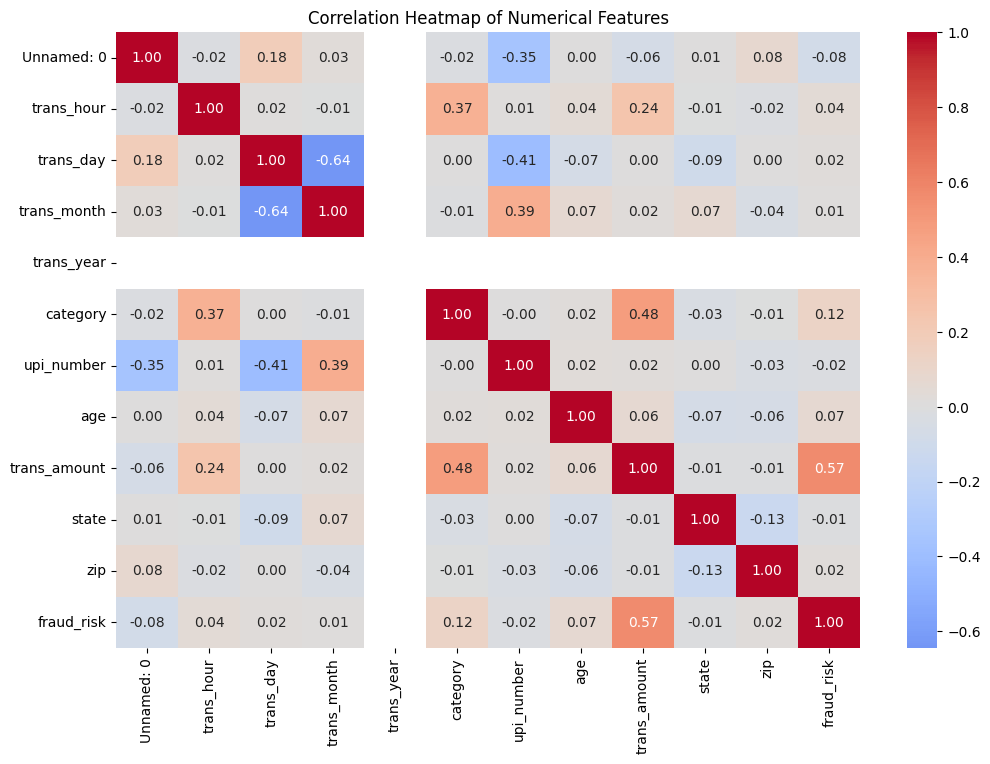

In [26]:
# 1. Correlation Heatmap with Annotations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns_df.corr(), 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f')  # Format correlation values to 2 decimal places
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Correlation check for fraud dataset

In [27]:
numeric_columns=fraud.select_dtypes(include=['int64','float64'])

In [28]:
corr= numeric_columns.corr()
corr

,Unnamed: 0,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
Unnamed: 0,1.000000,-0.004929,0.182883,0.044189,NaN,-0.017611,-0.311277,0.002000,-0.026269,-0.001941,0.142163,NaN
trans_hour,-0.004929,1.000000,0.015894,0.006097,NaN,0.497914,0.020995,0.120163,0.325752,0.010697,-0.030417,NaN
trans_day,0.182883,0.015894,1.000000,-0.675673,NaN,0.022034,-0.402775,-0.109740,-0.025202,-0.131533,0.027719,NaN
trans_month,0.044189,0.006097,-0.675673,1.000000,NaN,-0.044744,0.403180,0.096917,0.019311,0.086826,-0.080934,NaN
trans_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,-0.017611,0.497914,0.022034,-0.044744,NaN,1.000000,-0.008067,0.001054,0.675182,-0.045545,-0.035541,NaN
upi_number,-0.311277,0.020995,-0.402775,0.403180,NaN,-0.008067,1.000000,0.035480,0.035447,0.000205,-0.073227,NaN
age,0.002000,0.120163,-0.109740,0.096917,NaN,0.001054,0.035480,1.000000,0.045024,-0.078390,-0.106317,NaN
trans_amount,-0.026269,0.325752,-0.025202,0.019311,NaN,0.675182,0.035447,0.045024,1.000000,-0.016173,-0.035437,NaN
state,-0.001941,0.010697,-0.131533,0.086826,NaN,-0.045545,0.000205,-0.078390,-0.016173,1.000000,-0.140951,NaN


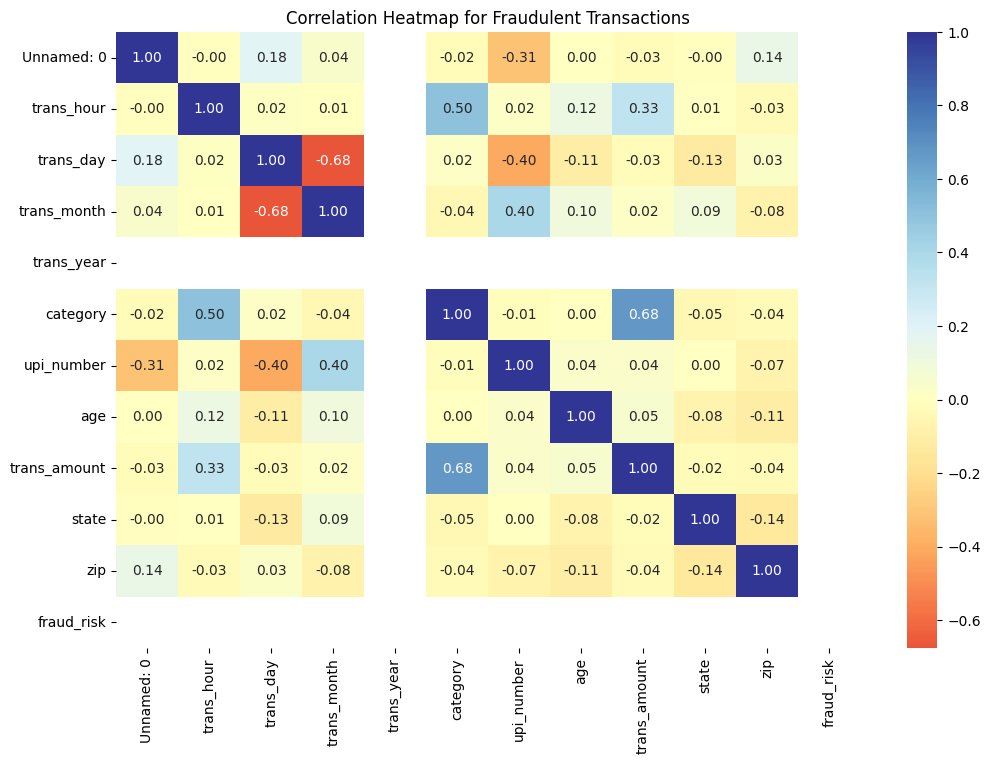

In [29]:
# 1. Basic Correlation Analysis for Fraud Cases
numeric_columns_fraud = fraud.select_dtypes(include=['int64', 'float64'])
corr_fraud = numeric_columns_fraud.corr()

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_fraud, 
            annot=True,
            cmap='RdYlBu',  # Different colormap for fraud
            center=0,
            fmt='.2f')
plt.title('Correlation Heatmap for Fraudulent Transactions')
plt.show()

# Visualizing Entire Dataset

In [30]:
#sns.pairplot(data=df,hue='fraud_risk',palette='viridis', diag_kind='dist')

# Visualizing Fraud Data

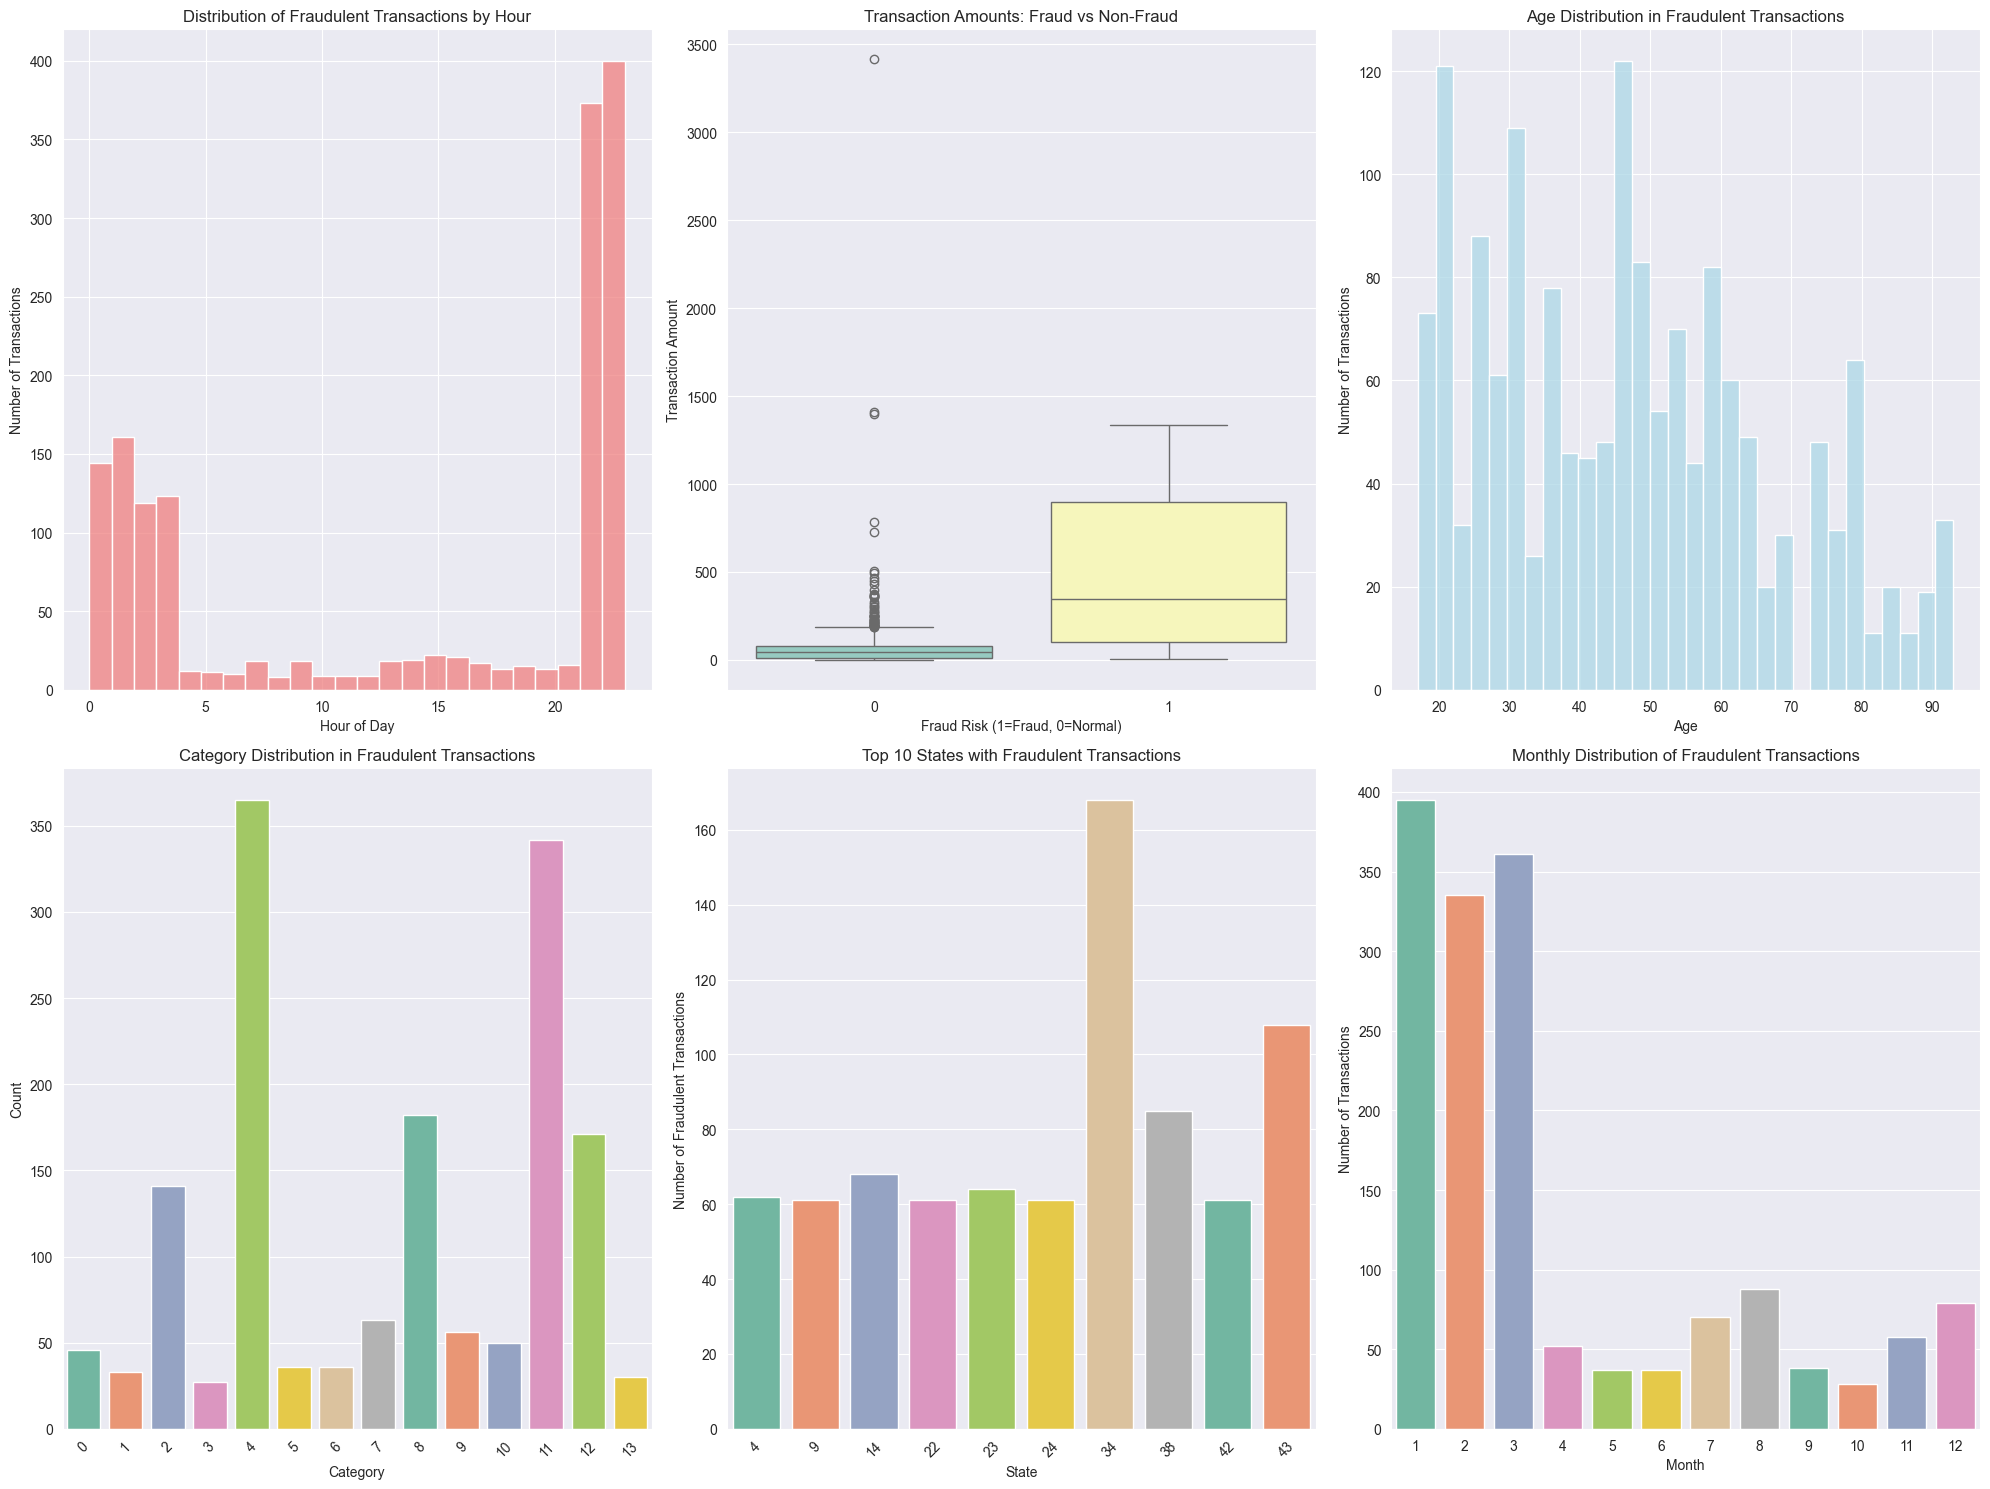

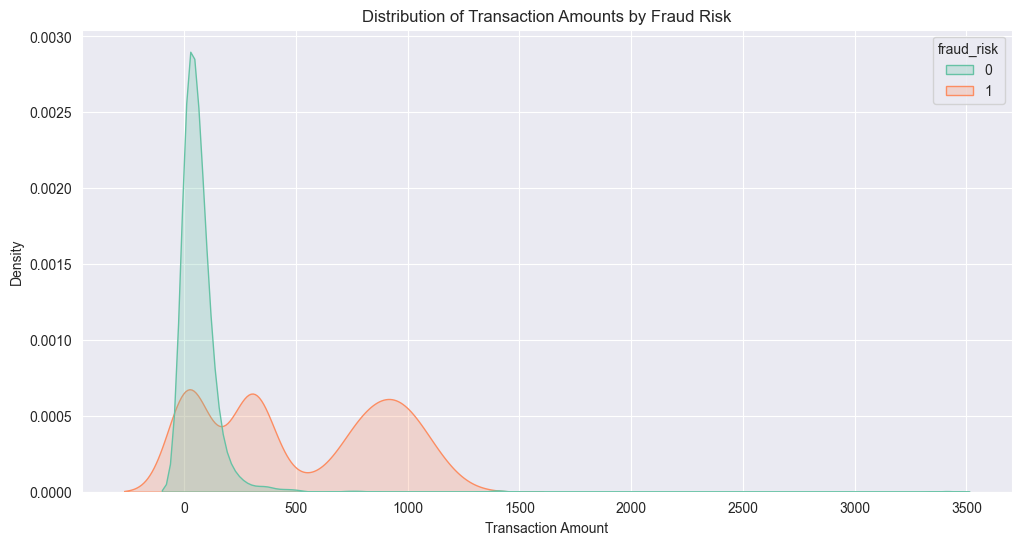

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn style
sns.set_style("darkgrid")

# Create a figure with appropriate size
fig = plt.figure(figsize=(20, 15))

# Plot 1: Distribution of Fraudulent Transactions by Hour
plt.subplot(2, 3, 1)
sns.histplot(data=fraud, x='trans_hour', bins=24, color='lightcoral')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')

# Plot 2: Distribution of Transaction Amounts in Fraud Cases
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='fraud_risk', y='trans_amount', palette='Set3')
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Fraud Risk (1=Fraud, 0=Normal)')
plt.ylabel('Transaction Amount')

# Plot 3: Age Distribution in Fraud Cases
plt.subplot(2, 3, 3)
sns.histplot(data=fraud, x='age', bins=30, color='lightblue')
plt.title('Age Distribution in Fraudulent Transactions')
plt.xlabel('Age')
plt.ylabel('Number of Transactions')

# Plot 4: Category Distribution in Fraud Cases
plt.subplot(2, 3, 4)
sns.countplot(data=fraud, x='category', palette='Set2')
plt.title('Category Distribution in Fraudulent Transactions')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot 5: State-wise Fraud Distribution
plt.subplot(2, 3, 5)
state_fraud = fraud['state'].value_counts().head(10)
sns.barplot(x=state_fraud.index, y=state_fraud.values, palette='Set2')
plt.title('Top 10 States with Fraudulent Transactions')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)

# Plot 6: Monthly Trend of Fraud Cases
plt.subplot(2, 3, 6)
sns.countplot(data=fraud, x='trans_month', palette='Set2')
plt.title('Monthly Distribution of Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Adjust layout
plt.tight_layout()
plt.show()

# Additional Analysis: Transaction Amount Distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='trans_amount', hue='fraud_risk', palette='Set2', fill=True)
plt.title('Distribution of Transaction Amounts by Fraud Risk')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()


In [32]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1578 entries, 12 to 2663
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1578 non-null   int64  
 1   trans_hour    1578 non-null   int64  
 2   trans_day     1578 non-null   int64  
 3   trans_month   1578 non-null   int64  
 4   trans_year    1578 non-null   int64  
 5   category      1578 non-null   int64  
 6   upi_number    1578 non-null   int64  
 7   age           1578 non-null   int64  
 8   trans_amount  1578 non-null   float64
 9   state         1578 non-null   int64  
 10  zip           1578 non-null   int64  
 11  fraud_risk    1578 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 160.3 KB


# Anova Test:

In [33]:
from scipy.stats import f_oneway
import pandas as pd

def anova_analysis(df, target_variable, alpha=0.05):
    numerical_vars = df.select_dtypes(include=['int64', 'float64','int32'])
    results = []

    for num_var in numerical_vars:
        groups = df.groupby(target_variable)[num_var].apply(list)
        f_statistic, p_value = f_oneway(*groups)

        if p_value < alpha:
            comment = f"Significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = ""
        else:
            comment = f"No significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = "Can be removed"

        results.append([num_var, f_statistic, p_value, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'F-statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Usage
results_df = anova_analysis(df, 'fraud_risk')
results_df


,Column,F-statistic,p-value,Comment,Recommendation
0,Unnamed: 0,17.841543,2.481420e-05,Significant difference in Unnamed: 0 between f...,
1,trans_hour,3.940338,4.724372e-02,Significant difference in trans_hour between f...,
2,trans_day,1.390705,2.383913e-01,No significant difference in trans_day between...,Can be removed
3,trans_month,0.549453,4.586065e-01,No significant difference in trans_month betwe...,Can be removed
4,trans_year,NaN,NaN,No significant difference in trans_year betwee...,Can be removed
5,category,42.266576,9.474895e-11,Significant difference in category between fra...,
6,upi_number,0.849311,3.568306e-01,No significant difference in upi_number betwee...,Can be removed
7,age,11.841635,5.881297e-04,Significant difference in age between fraud an...,
8,trans_amount,1255.076038,1.339525e-225,Significant difference in trans_amount between...,
9,state,0.384602,5.352038e-01,No significant difference in state between fra...,Can be removed


# Encoding and Scaling

In [34]:
data = df.copy()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2666 non-null   int64  
 1   trans_hour    2666 non-null   int64  
 2   trans_day     2666 non-null   int64  
 3   trans_month   2666 non-null   int64  
 4   trans_year    2666 non-null   int64  
 5   category      2666 non-null   int64  
 6   upi_number    2666 non-null   int64  
 7   age           2666 non-null   int64  
 8   trans_amount  2666 non-null   float64
 9   state         2666 non-null   int64  
 10  zip           2666 non-null   int64  
 11  fraud_risk    2666 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 250.1 KB


In [36]:
data.head()

,Unnamed: 0,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
0,0,0,1,1,2022,12,9957000001,54,66.21,22,49879,0
1,1,1,1,1,2022,3,9957000002,15,55.81,14,62668,0
2,2,3,1,1,2022,8,9957000003,60,8.68,4,96037,0
3,3,6,1,1,2022,4,9957000004,44,89.52,40,29911,0
4,4,6,1,1,2022,0,9957000005,72,1.90,38,16421,0


In [37]:
data.dtypes

Unnamed: 0        int64
trans_hour        int64
trans_day         int64
trans_month       int64
trans_year        int64
category          int64
upi_number        int64
age               int64
trans_amount    float64
state             int64
zip               int64
fraud_risk        int64
dtype: object

In [38]:
data.shape

(2666, 12)

# To improve the computational effeciency, taking 50% of the entire data for model building and testing keeping the ratio intact

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into 'fraud' and 'non-fraud' classes
fraud_data = data[data['fraud_risk'] == 1]
non_fraud_data = data[data['fraud_risk'] == 0]

# Sample each class separately while maintaining proportions
sampled_fraud_data = fraud_data.sample(frac=0.5, random_state=42)
sampled_non_fraud_data = non_fraud_data.sample(frac=0.5, random_state=42)

# Combine the sampled data back together
data = pd.concat([sampled_fraud_data, sampled_non_fraud_data])



In [40]:
columns_to_drop = ['Id', 'trans_day', 'trans_month', 'trans_year', 'upi_number', 'zip']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=existing_columns_to_drop)

# Print remaining columns to verify
print("\nRemaining columns:", data.columns.tolist())


Remaining columns: ['Unnamed: 0', 'trans_hour', 'category', 'age', 'trans_amount', 'state', 'fraud_risk']


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform scaling
def preprocess_data(X):

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('fraud_risk', axis=1)
y = data['fraud_risk']

# Preprocess the features
X_scaled = preprocess_data(X)

# Split the preprocessed data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (1066, 6)
Test features shape: (267, 6)
Training target shape: (1066,)
Test target shape: (267,)


# Oversampling(SMOTE)

In [43]:
from imblearn.over_sampling import SMOTE
X = data.drop('fraud_risk',axis=1)
y = data['fraud_risk']
X_res, y_res = SMOTE().fit_resample(X, y)

In [44]:
X.shape

(1333, 6)

In [45]:
y.shape

(1333,)

In [46]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority class
X_res, y_res = SMOTE().fit_resample(X, y)
print(y_res.value_counts())


fraud_risk
1    789
0    789
Name: count, dtype: int64


In [47]:
print("X_res shape:", X_res.shape)
print("\nX_res columns:")
print(X_res.columns.tolist())


X_res shape: (1578, 6)

X_res columns:
['Unnamed: 0', 'trans_hour', 'category', 'age', 'trans_amount', 'state']


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

# Assuming X and y are already defined (features and target)
# Example:
# X = <your_feature_matrix>
# y = <your_target_vector>

# Define models dictionary
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=2
    ),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced'
    ),
    
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        min_samples_split=5
    ),
    
    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=1,
        gamma=0,
        reg_alpha=0.209,
        reg_lambda=1.545,
        scale_pos_weight=1,
        random_state=42
    ),
    
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        C=1.0,
        class_weight='balanced'
    ),
    
    "Naive Bayes": GaussianNB(
        var_smoothing=1e-9
    ),
    
    "AdaBoost": AdaBoostClassifier(
        n_estimators=50,
        learning_rate=1.0
    ),
    
    "Bagging": BaggingClassifier(
        n_estimators=50,
        max_samples=0.8,
        max_features=0.8
    ),
    
    "Extra Trees": ExtraTreesClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5
    ),
    
    "CatBoost": CatBoostClassifier(
        iterations=100,
        depth=5,
        learning_rate=0.1,
        verbose=False
    )
}

# Set up k-fold cross-validation (k=5 in this example)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store results for each model and fold
cv_results = []

# Perform k-fold cross-validation for each model
# Convert SMOTE output back to pandas DataFrame/Series
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.Series(y_res)

# Now perform k-fold cross validation with the balanced data
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    fold_results = []

    for fold, (train_index, test_index) in enumerate(kf.split(X_res)):
        # Split data using X_res and y_res
        X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
        y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]

        # Rest of the code remains the same
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        fold_results.append(score)
        print(f"  Fold {fold+1}: Accuracy = {score:.4f}")

    # After completing all folds, store the mean and std of accuracy scores
    cv_results.append({
        "Model": model_name,
        "Accuracy (Fold 1)": fold_results[0],
        "Accuracy (Fold 2)": fold_results[1],
        "Accuracy (Fold 3)": fold_results[2],
        "Accuracy (Fold 4)": fold_results[3],
        "Accuracy (Fold 5)": fold_results[4],
        "Mean Accuracy": np.mean(fold_results),
        "Std Dev Accuracy": np.std(fold_results)
    })

# Convert results to a DataFrame for better visualization
df_cv_results = pd.DataFrame(cv_results)

# Display the results
print("\nCross-validation Results:")
print(df_cv_results)

# Sort the results by Mean Accuracy in descending order to find the best model
best_model = df_cv_results.sort_values(by="Mean Accuracy", ascending=False).iloc[0]

# Print the best model and its details
print("\nBest Model Based on Cross-Validation:")
print(best_model)

# Optionally, you can save the results to a CSV file
df_cv_results.to_csv("kfold_cross_validation_results.csv", index=False)

Evaluating Decision Tree...
  Fold 1: Accuracy = 0.9430
  Fold 2: Accuracy = 0.9114
  Fold 3: Accuracy = 0.9241
  Fold 4: Accuracy = 0.9270
  Fold 5: Accuracy = 0.9333
Evaluating Random Forest...
  Fold 1: Accuracy = 0.9684
  Fold 2: Accuracy = 0.9272
  Fold 3: Accuracy = 0.9525
  Fold 4: Accuracy = 0.9429
  Fold 5: Accuracy = 0.9492
Evaluating Gradient Boosting...
  Fold 1: Accuracy = 0.9684
  Fold 2: Accuracy = 0.9399
  Fold 3: Accuracy = 0.9525
  Fold 4: Accuracy = 0.9365
  Fold 5: Accuracy = 0.9460
Evaluating XGBoost...
  Fold 1: Accuracy = 0.9778
  Fold 2: Accuracy = 0.9430
  Fold 3: Accuracy = 0.9620
  Fold 4: Accuracy = 0.9587
  Fold 5: Accuracy = 0.9651
Evaluating Logistic Regression...
  Fold 1: Accuracy = 0.8513
  Fold 2: Accuracy = 0.7690
  Fold 3: Accuracy = 0.8133
  Fold 4: Accuracy = 0.8413
  Fold 5: Accuracy = 0.8254
Evaluating Naive Bayes...
  Fold 1: Accuracy = 0.8576
  Fold 2: Accuracy = 0.7816
  Fold 3: Accuracy = 0.8259
  Fold 4: Accuracy = 0.8667
  Fold 5: Accuracy